# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [73]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [74]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)


# Questoin 1
Scatter plot the dataset

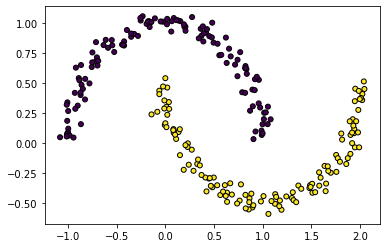

In [75]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")


# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

K-Means will perform badly 
because it can not deal with complicated geometric shapes such as moons and circles as it needs linear separability of the clusters

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

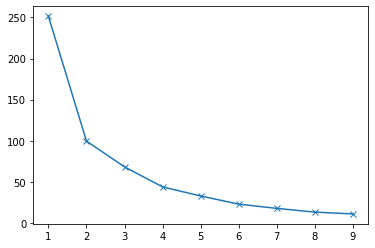

In [76]:
from sklearn import metrics
inertia=[]
K=range(1,10)
for k in K:
    model=KMeans(n_clusters=k)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(K,inertia,'x-')


BEST k =3 according to elbow method

-99.48652012837258


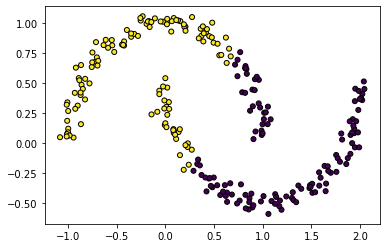

In [77]:
model=KMeans(n_clusters=2)
model.fit(X)
label = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=label, s=25, edgecolor="k")
print(model.score(X,y))

model preform boorly as expected

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

1- threshold =0 as u dont have outliers

2- best interval value =8

3- as clique discretizes the data space through a grid and estimates the density by counting the number
of points in a grid cell

this allows u to ignore the shape of the data which was a problem with k-means



Amount of clusters: 2


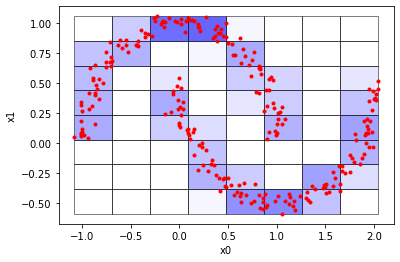

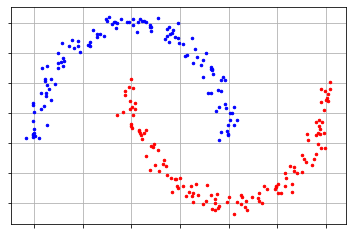

In [78]:

intervals = 8
threshold = 0
clique_instance = clique(X, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
# visualize clustering results
clique_visualizer.show_grid(cells, X)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

- number of clusters = 4 because of the outliers, there are two grids with more than 6 points was given a new class because they r surrounded with outliers higher threshold will consider these as outliers and num of clusters would be 2 but with more outliers .

- By the use of the Euclidean distance K-means treats the data space as isotropic (distances unchanged by translations and rotations). but this data is anisotropic.


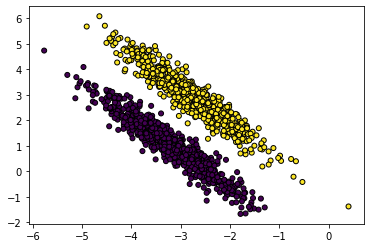

In [79]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], marker="o", c=y, s=25, edgecolor="k")


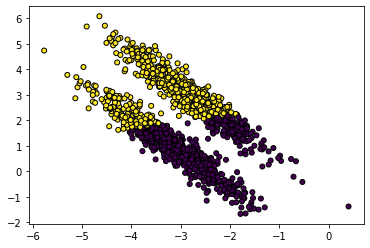

In [86]:
model=KMeans(n_clusters=2)
model.fit(X_aniso)
label = model.fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], marker="o", c=label, s=25, edgecolor="k")

Amount of clusters: 4


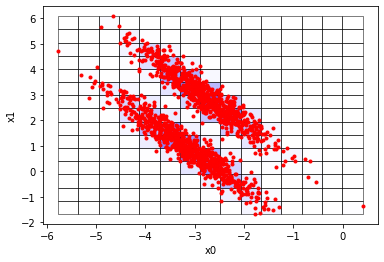

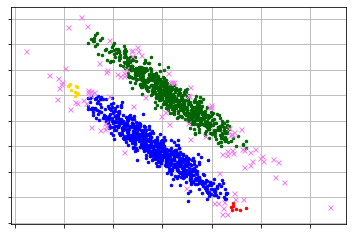

In [122]:
clique_instance = clique(X_aniso,15 ,6)
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
# visualize clustering results
clique_visualizer.show_grid(cells, X_aniso)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X_aniso, clusters, noise)  # show clustering results

Amount of clusters: 2


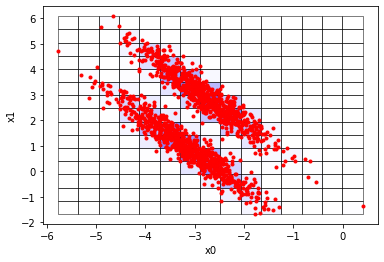

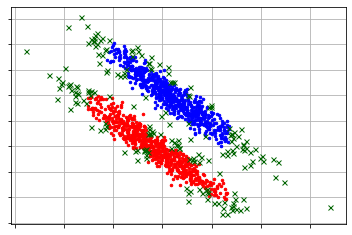

In [133]:
clique_instance = clique(X_aniso,15 ,10)
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
# visualize clustering results
clique_visualizer.show_grid(cells, X_aniso)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X_aniso, clusters, noise)  # show clustering results

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [82]:
def pca(data,n):
    data=data-np.mean(data,axis = 0)
    cov = np.cov(data, rowvar = False)
    eigenValues , eigenVectors = np.linalg.eigh(cov)
    sorted_index = np.argsort(eigenValues)[::-1]
    sorted_eigenvalue = eigenValues[sorted_index]
    sorted_eigenvectors = eigenVectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:n]
    eigenvalue_subset = sorted_eigenvalue[0:n]
    transformeddata = np.dot(eigenvector_subset.transpose(),data.transpose()).transpose() 
    return transformeddata,eigenvector_subset,eigenvalue_subset



<AxesSubplot:xlabel='PC1', ylabel='PC2'>

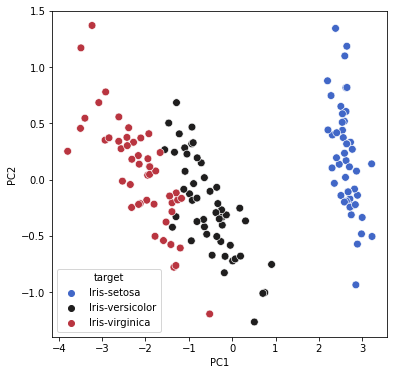

In [83]:
import pandas as pd
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced ,_,_= pca(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')




# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [84]:
import random
from scipy.spatial.distance import cdist 

def KMeansclustering(data,n,no_of_iterations=200):
    idx = np.random.choice(len(data), n, replace=False)
    centroids = data[idx, :] 
    distances = cdist(data, centroids ,'euclidean') 
    points = np.array([np.argmin(i) for i in distances]) 
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(n):
            temp_cent = data[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
        centroids = np.vstack(centroids) 
        distances = cdist(data, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    return centroids 



In [85]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
clustercenters=KMeansclustering(X,2)
print(clustercenters)
model=KMeans(n_clusters=2)
model.fit(X)
print(model.cluster_centers_)

[[-0.21580413  0.58471364]
 [ 1.19954086 -0.07033668]]
[[-0.21580413  0.58471364]
 [ 1.19954086 -0.07033668]]
